<a href="https://colab.research.google.com/github/Anshuman776/Machine-Learning-Project/blob/main/Implementation_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataframe = pd.read_csv("/content/WineQT.csv")
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


checking null


In [5]:
dataframe.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
dataframe.shape

(1143, 12)

In [7]:
dataframe.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


EDA

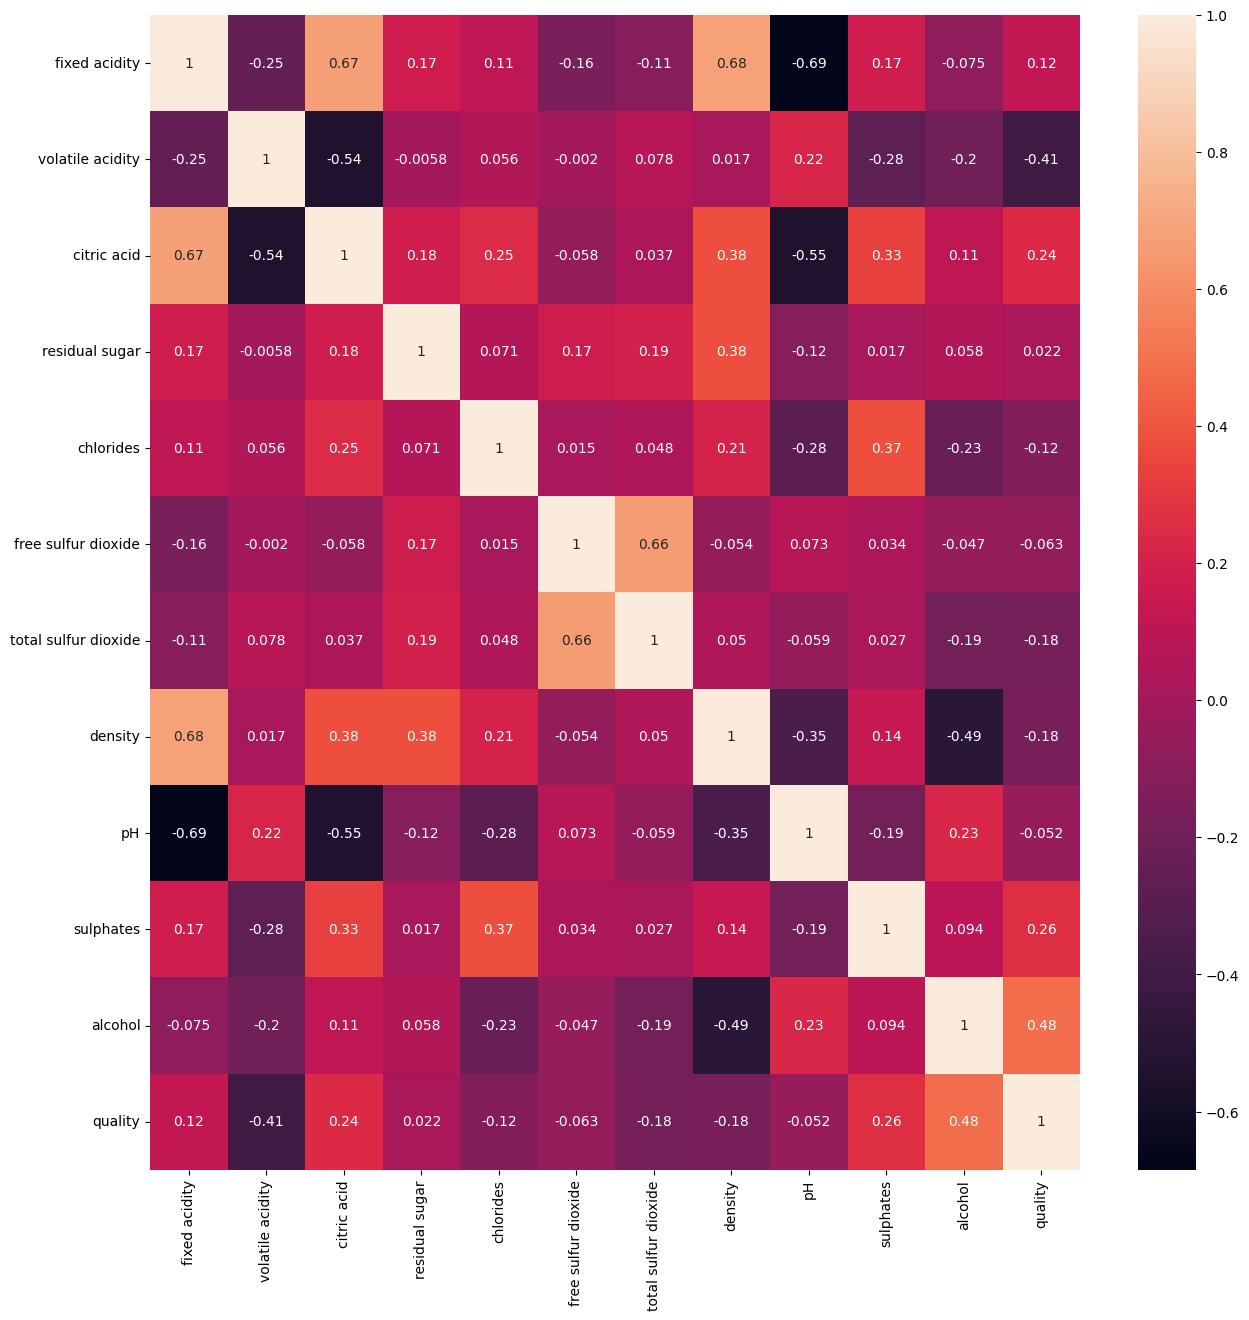

In [8]:
dataframe.corr()
plt.figure(figsize=(15,15))
ax =sns.heatmap(dataframe.corr(),annot = True)
plt.savefig('cprrelation - coefficient.jpg')
plt.show()

In [9]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/tmp/ipython-input-3538871692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['fixed acidity'])


<Axes: xlabel='fixed acidity', ylabel='Density'>

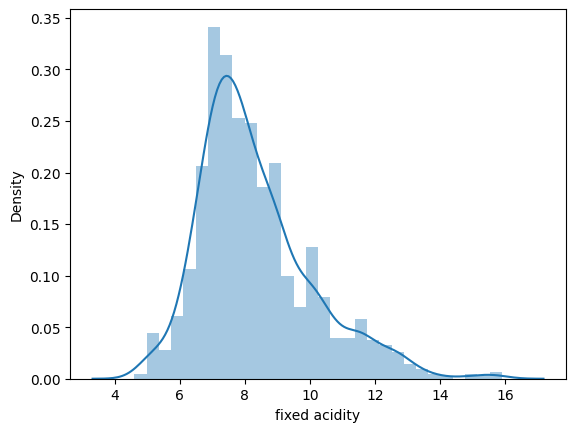

In [10]:
sns.distplot(dataframe['fixed acidity'])

/tmp/ipython-input-1230425937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['volatile acidity'])


<Axes: xlabel='volatile acidity', ylabel='Density'>

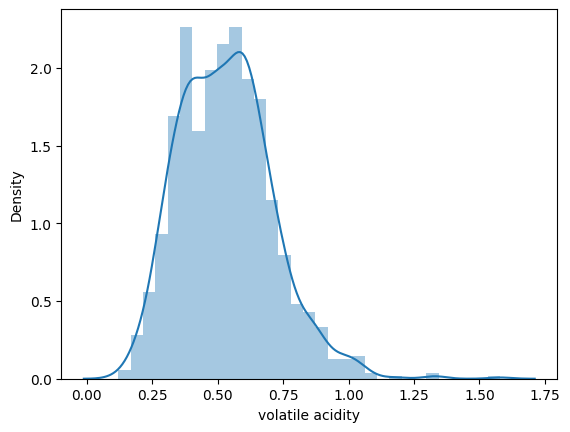

In [11]:
sns.distplot(dataframe['volatile acidity'])

/tmp/ipython-input-1353866125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['citric acid'])


<Axes: xlabel='citric acid', ylabel='Density'>

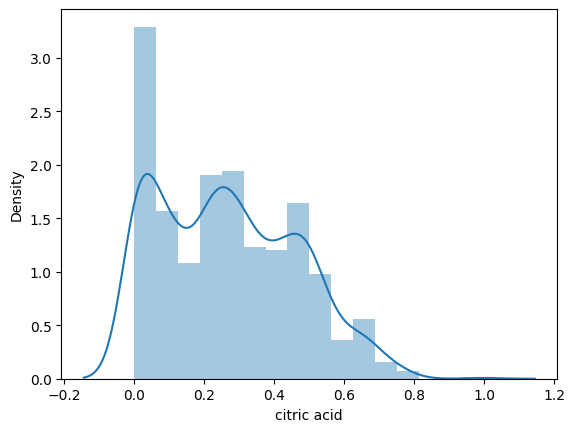

In [12]:
sns.distplot(dataframe['citric acid'])

/tmp/ipython-input-1093111192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['residual sugar'])


<Axes: xlabel='residual sugar', ylabel='Density'>

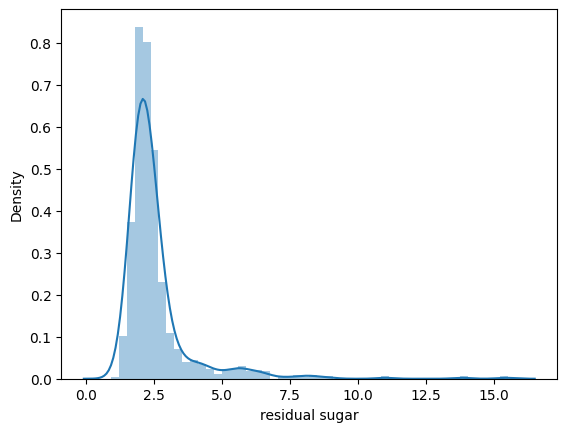

In [13]:
sns.distplot(dataframe['residual sugar'])

/tmp/ipython-input-83097571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot  (dataframe['chlorides'])


<Axes: xlabel='chlorides', ylabel='Density'>

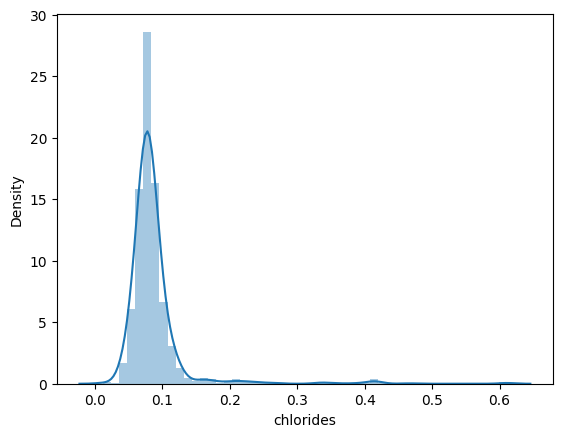

In [14]:
sns.distplot  (dataframe['chlorides'])

/tmp/ipython-input-668533715.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['free sulfur dioxide'])


<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

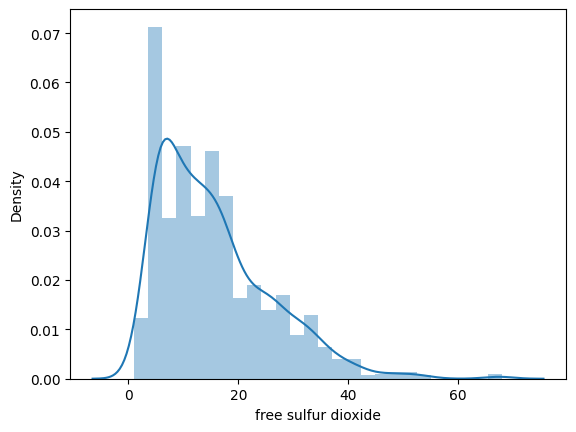

In [15]:
sns.distplot(dataframe['free sulfur dioxide'])

/tmp/ipython-input-3216493023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['total sulfur dioxide'])


<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

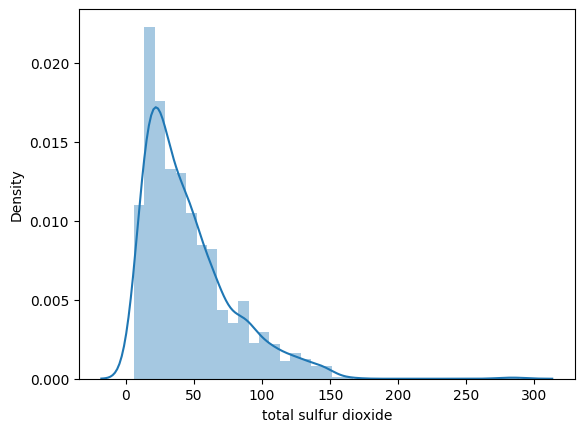

In [16]:
sns.distplot(dataframe['total sulfur dioxide'])

/tmp/ipython-input-2013836036.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['density'])


<Axes: xlabel='density', ylabel='Density'>

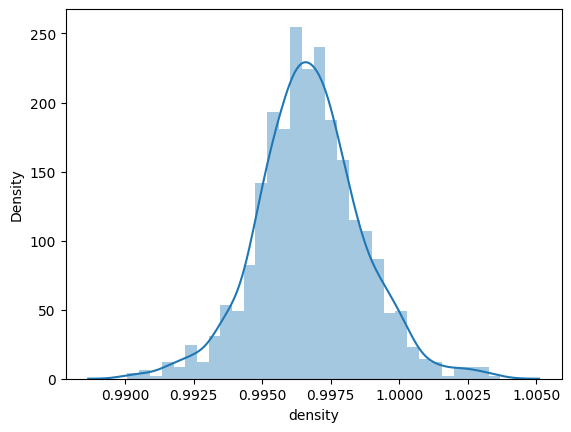

In [17]:
sns.distplot(dataframe['density'])

/tmp/ipython-input-3982626301.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['pH'])


<Axes: xlabel='pH', ylabel='Density'>

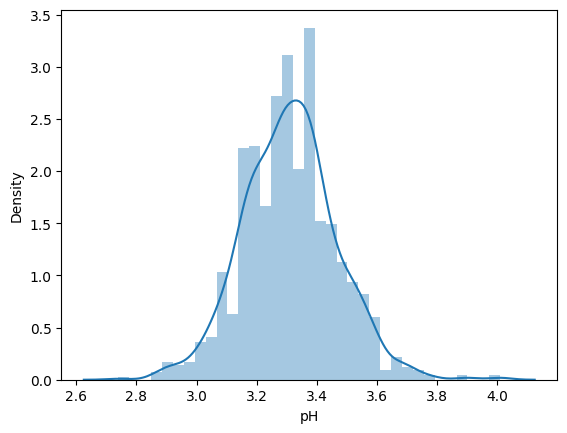

In [18]:
sns.distplot(dataframe['pH'])

/tmp/ipython-input-3696120931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['sulphates'])


<Axes: xlabel='sulphates', ylabel='Density'>

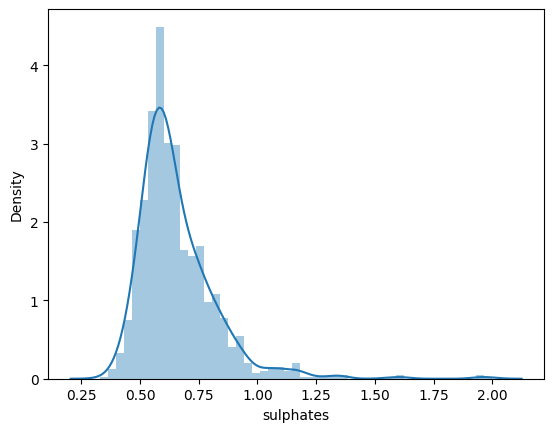

In [19]:
sns.distplot(dataframe['sulphates'])

/tmp/ipython-input-4088744749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

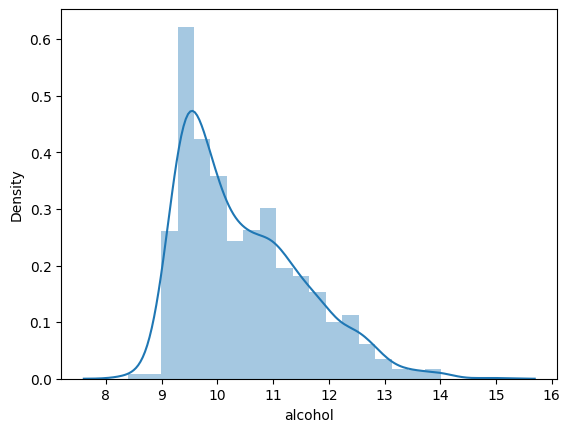

In [20]:
sns.distplot(dataframe['alcohol'])

/tmp/ipython-input-153410866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['quality'])


<Axes: xlabel='quality', ylabel='Density'>

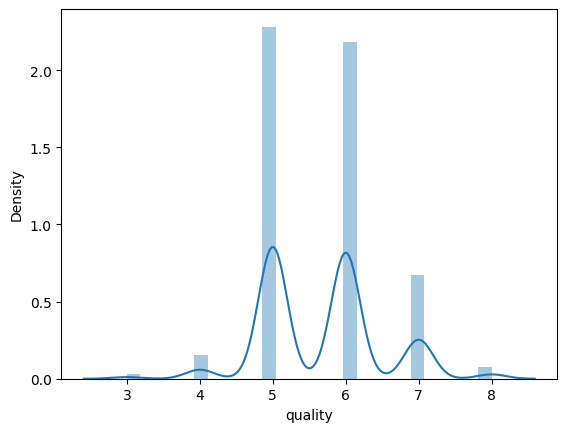

In [21]:
sns.distplot(dataframe['quality'])

In [23]:
dataframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:


dataframe['quality'] = dataframe['quality'].replace(0, dataframe['quality'].mean())
dataframe['alcohol'] = dataframe['alcohol'].replace(0, dataframe['alcohol'].median())
dataframe['sulphates'] = dataframe['sulphates'].replace(0, dataframe['sulphates'].median())
dataframe['pH'] = dataframe['pH'].replace(0, dataframe['pH'].mean())
dataframe['density'] = dataframe['density'].replace(0, dataframe['density'].mean())
dataframe['total sulfur dioxide'] = dataframe['total sulfur dioxide'].replace(0, dataframe['total sulfur dioxide'].median())
dataframe['free sulfur dioxide'] = dataframe['free sulfur dioxide'].replace(0, dataframe['free sulfur dioxide'].median())
dataframe['chlorides'] = dataframe['chlorides'].replace(0, dataframe['chlorides'].median())
dataframe['residual sugar'] = dataframe['residual sugar'].replace(0, dataframe['residual sugar'].median())
dataframe['citric acid'] = dataframe['citric acid'].replace(0, dataframe['citric acid'].mean())
dataframe['volatile acidity'] = dataframe['volatile acidity'].replace(0, dataframe['volatile acidity'].mean())
dataframe['volatile acidity'] = dataframe['volatile acidity'].replace(0, dataframe['volatile acidity'].mean())

In [29]:
X = dataframe.drop(columns='quality',axis = 1)
y = dataframe['quality']

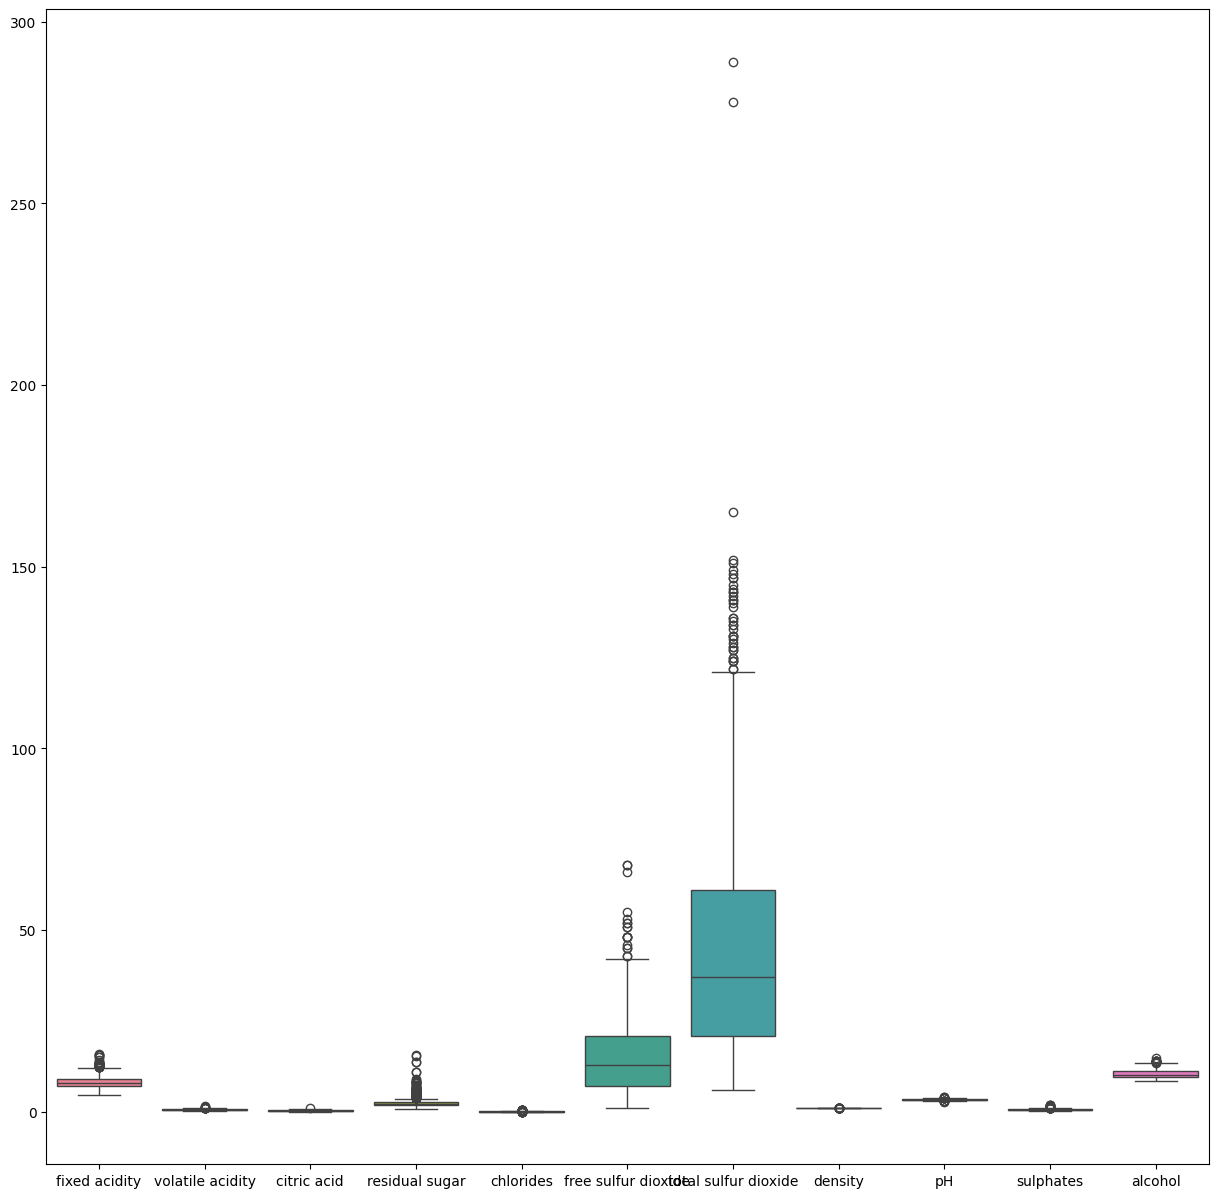

In [30]:
fix,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=X,ax=ax)
plt.savefig('boxplot.jpg')
plt.show()

Define Outlier Boundaries using IQR Method

In [68]:
cols =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Initialize a combined mask
combined_mask = pd.Series(True, index=X.index)

for col in cols:
  Q1 =X[col].quantile(0.25)
  Q3 =X[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Update the combined mask with the current column's mask
  combined_mask = combined_mask & ((X[col] >= lower_bound) & (X[col]<= upper_bound))

# filter dataset to remove outliers
X_outlier_detection = X[combined_mask]
y_outlier_detection = y[combined_mask]

In [69]:
X_outlier_detection.shape

(848, 11)

In [70]:
# standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier_detection)

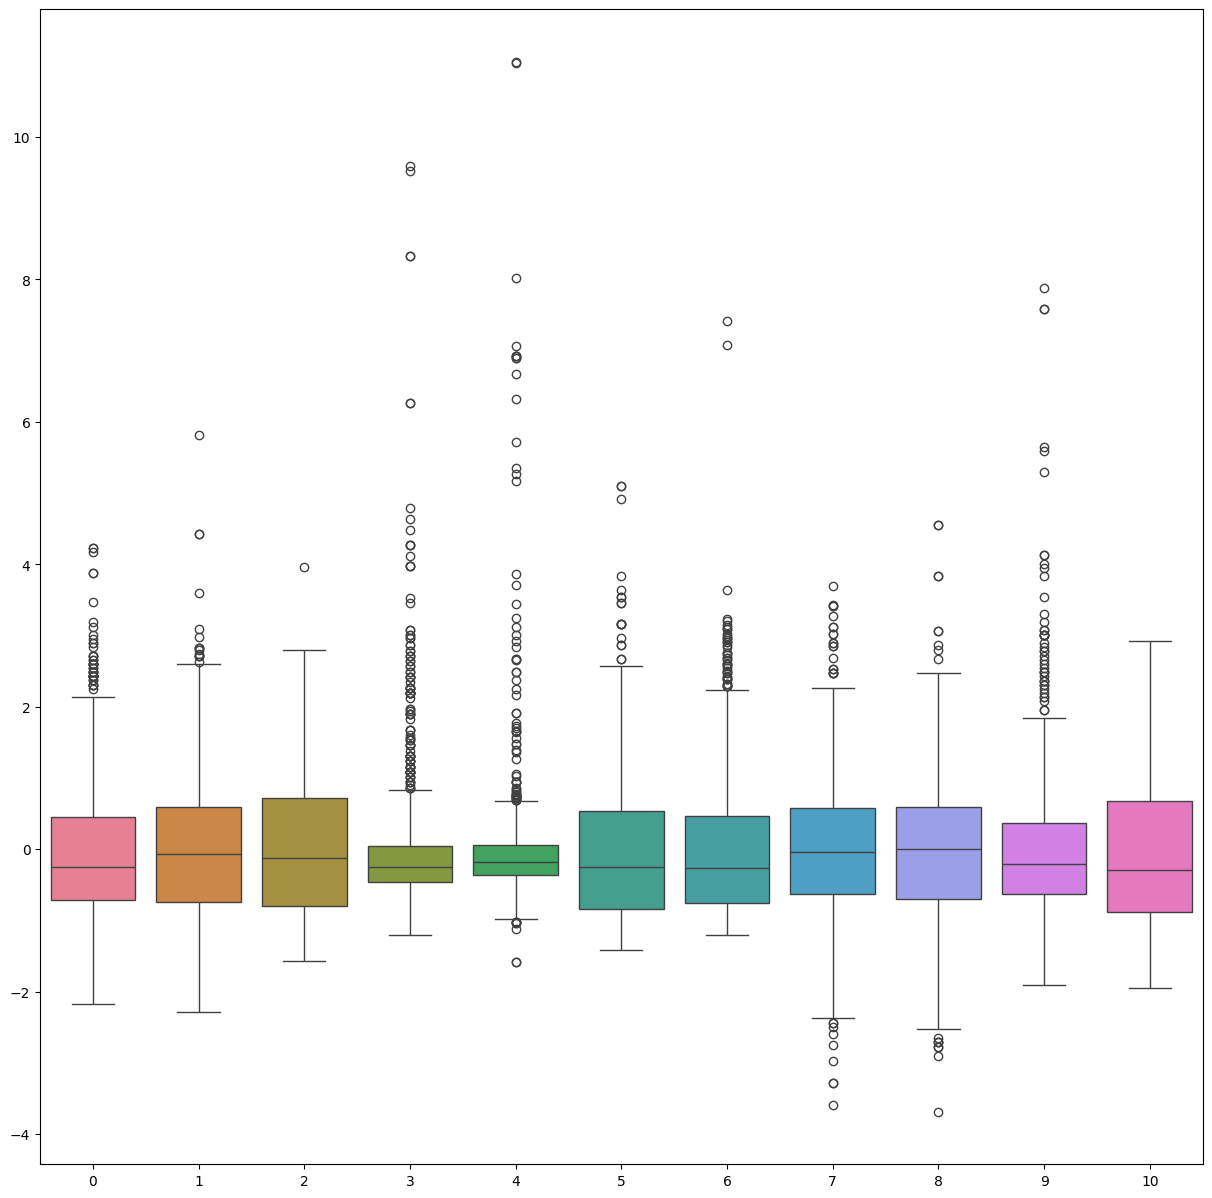

In [35]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data =X_scaled , ax=ax)
plt.savefig('newboxPlot.jpg')

In [71]:
X_outlier_detection.shape

(848, 11)

In [72]:
# standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier_detection)

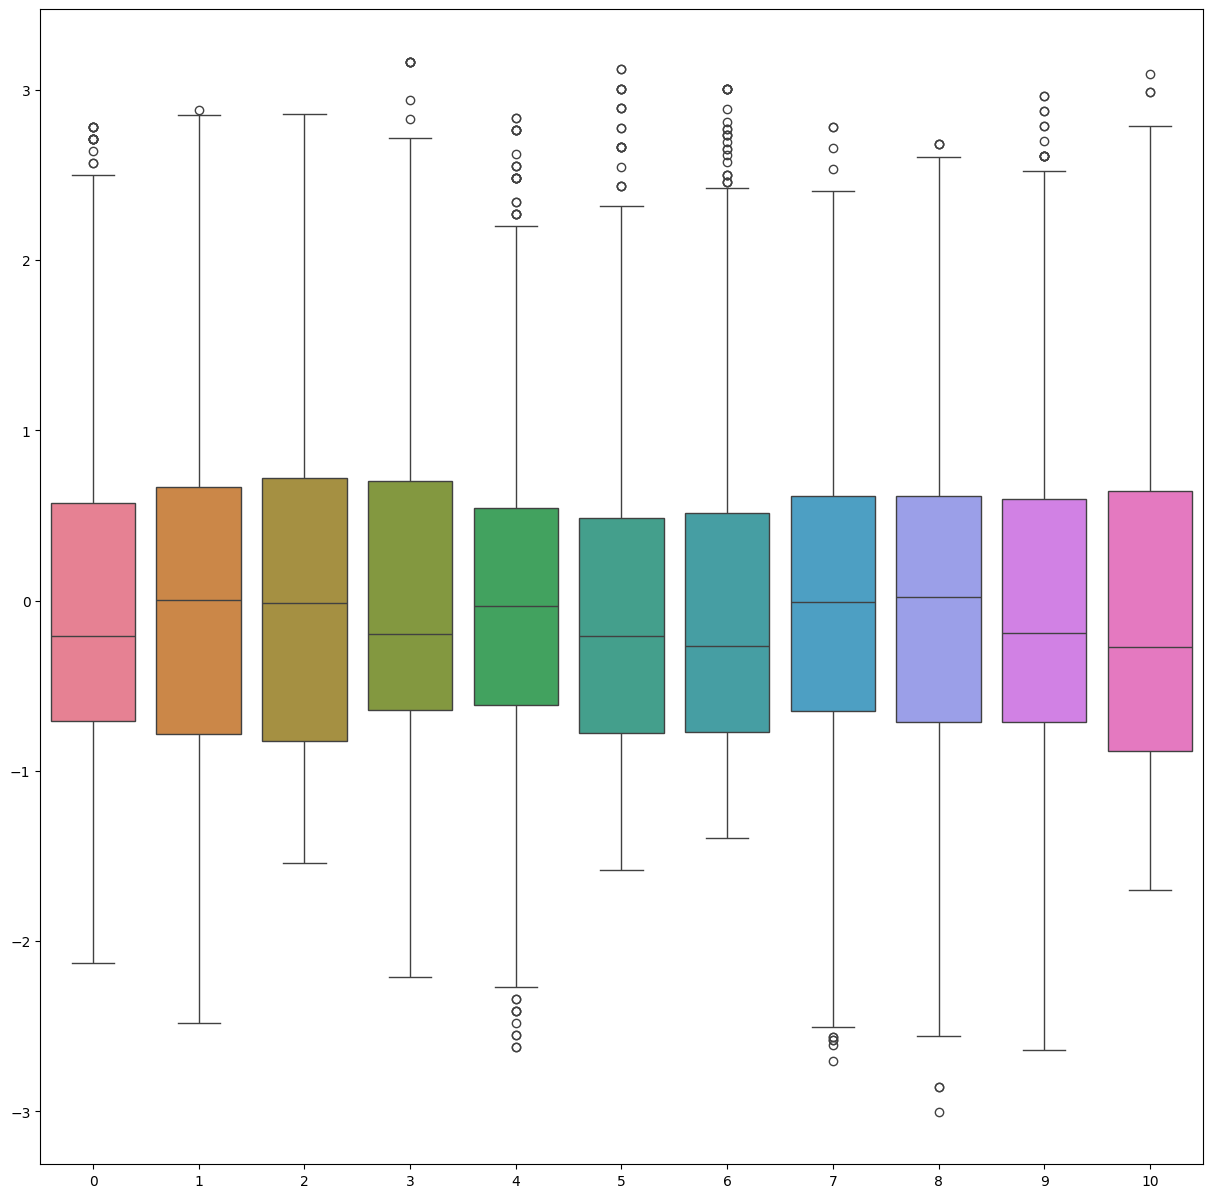

In [73]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data =X_scaled , ax=ax)
plt.savefig('newboxPlot.jpg')

In [74]:
# Convert numpy arrays back to pandas DataFrame/Series
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y_outlier_detection = pd.Series(y_outlier_detection)

X_scaled.reset_index(drop=True, inplace=True)
y_outlier_detection.reset_index(drop=True, inplace=True)

In [75]:
q = X_scaled['total sulfur dioxide'].quantile(.95)
mask = X_scaled['total sulfur dioxide'] < q
dataNew = X_scaled[mask]

# Apply the same mask to y_outlier_detection
y_outlier_detection = y_outlier_detection[mask]

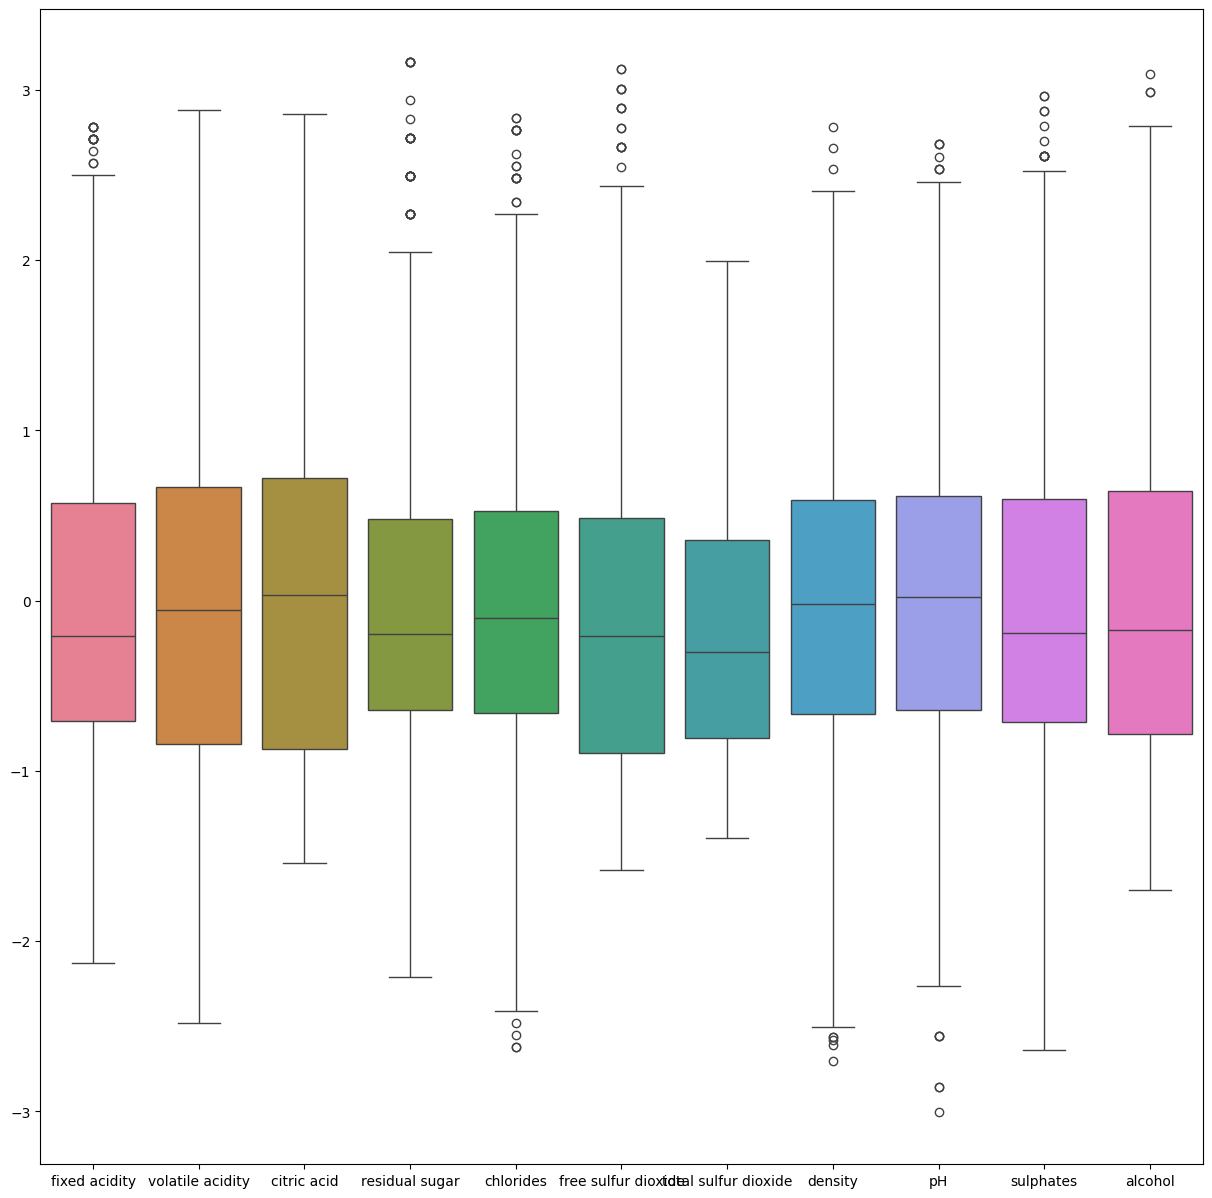

In [76]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data =dataNew , ax=ax)
plt.savefig('finalboxPlot.jpg')

In [77]:
dataNew.shape

(801, 11)

# train and test set

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataNew,y_outlier_detection)

In [37]:
# Convert numpy arrays back to pandas DataFrame/Series
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y_outlier_detection = pd.Series(y_outlier_detection)

X_scaled.reset_index(drop=True, inplace=True)
y_outlier_detection.reset_index(drop=True, inplace=True)


In [63]:
q = X_scaled['total sulfur dioxide'].quantile(.95)
mask = X_scaled['total sulfur dioxide'] < q
dataNew = X_scaled[mask]

# Apply the same mask to y_outlier_detection
y_outlier_detection = y_outlier_detection[mask]

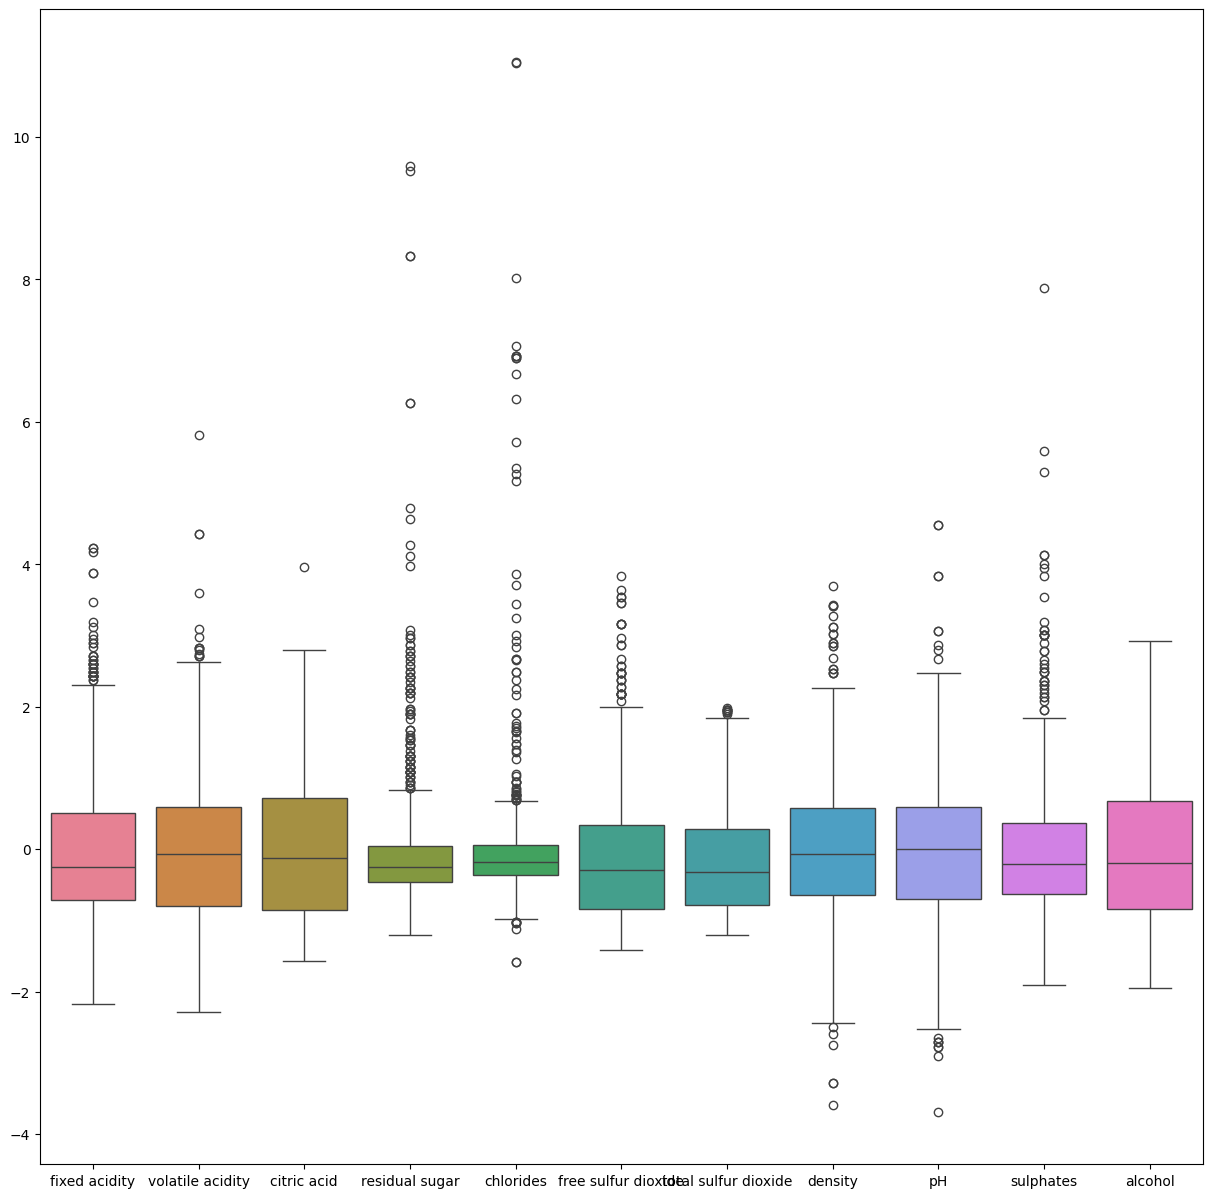

In [65]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data =dataNew , ax=ax)
plt.savefig('finalboxPlot.jpg')

In [66]:
dataNew.shape

(1072, 11)

In [44]:
# train and test set

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataNew,y_outlier_detection)

In [80]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
# svc

In [84]:
from sklearn.svm import SVC
svm_classifier= SVC()
svm_classifier.fit(X_train, y_train)

SVC()

Hyperparameter tuning

In [89]:
score = svm_classifier.score(X_test, y_test)
print(score)

0.6318407960199005


using grid search cv

In [85]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.1,1,10,100],
    'gamma':['scale','auto'],
    'kernel':['linear','rbf','poly'],
    'degree':[2,3,4]
}
grid_search =GridSearchCV(svm_classifier,param_grid,cv=5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print(best_params)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


randomize search cv

In [86]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(svm_classifier,param_grid,cv=5)
random_search.fit(X_train,y_train)
best_params = random_search.best_params_
print(best_params)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 1}


train model with optimized parameter

In [94]:
svm_classifier_optimizedparams = SVC(C=1, gamma='scale', kernel='rbf', degree=2)
svm_classifier_optimizedparams.fit(X_train, y_train)
score = svm_classifier_optimizedparams.score(X_test, y_test)
print(f'Optimized SVM Test Accuracy: {score}')

Optimized SVM Test Accuracy: 0.6318407960199005


it means both without params and normal are same

accuracy score is not good we have work on this data future

future visit i have da its accuracy above 80%

*   Precision
* Recall
* F1-score
* Confusion Matrix
* Use SMOTE, undersampling, or class_weight='balanced' in SVC
  

